# A- lecture du fichier de sentiments et analyse rapide
* 1.6 millions de tweets 
* quelques doublons avec des target différents (3400 lignes en moins apres drop duplicates)
* 660000 users
* le plus prolifique a 550 tweets
* 2 targets 0 et 4 équilibrés
* **attention a utiliser le encoding latin pour eviter les problèmes de décodage** 

In [3]:
import pandas as pd
import time

start = time.time()
data = pd.read_csv('input/sentiment140/training.1600000.processed.noemoticon.csv', delimiter = ',', header=None, encoding='latin-1')
print(time.time()-start)
print('le fichier contient ', len(data.index),'lignes' )
data.columns=['target','id','date','flag','user','text']
display(data.iloc[240448:240458])


2.589480400085449
le fichier contient  1600000 lignes


,target,id,date,flag,user,text
240448,0,1980877674,Sun May 31 07:53:59 PDT 2009,NO_QUERY,Talpal,off to work..
240449,0,1980877722,Sun May 31 07:53:59 PDT 2009,NO_QUERY,jamiemcflyx,"MSN is a fail, it's not flashing, so if you ge..."
240450,0,1980877922,Sun May 31 07:54:01 PDT 2009,NO_QUERY,Stoddly,"just watched dreamcatcher, it's been a while. ..."
240451,0,1980878463,Sun May 31 07:54:06 PDT 2009,NO_QUERY,Pxeuian,needs privacy at all times... Certain informat...
240452,0,1980878581,Sun May 31 07:54:07 PDT 2009,NO_QUERY,taleezzy,at ucr waving for my test to start.... it wi...
240453,0,1980878858,Sun May 31 07:54:09 PDT 2009,NO_QUERY,tealperez,@LaceeLynch uhh so sad- i freaking went to sle...
240454,0,1980878950,Sun May 31 07:54:10 PDT 2009,NO_QUERY,mgpyone,faceyourmanga.com áá±áá¬áá¹á¸áá°á...
240455,0,1980879397,Sun May 31 07:54:14 PDT 2009,NO_QUERY,Nathan133,I havent met rh not even once. SIGH
240456,0,1980880233,Sun May 31 07:54:21 PDT 2009,NO_QUERY,ganeshk254,my vista won't boot whatever i do
240457,0,1980880412,Sun May 31 07:54:22 PDT 2009,NO_QUERY,mysticmoons,@USAwriter my mom passed away


In [2]:
print(len(set(data.id)))
print(data.id.value_counts())
display(data.loc[data.id==2064606564,:])

1598315
2064606564    2
1880439717    2
2053869990    2
1979209147    2
2000739050    2
             ..
1990816380    1
1792862920    1
2224853703    1
1685887686    1
1972772670    1
Name: id, Length: 1598315, dtype: int64


,target,id,date,flag,user,text
431741,0,2064606564,Sun Jun 07 06:43:10 PDT 2009,NO_QUERY,Al_ice,@GoetzMehroxoff Oh well! Thank goodness home...
1467386,4,2064606564,Sun Jun 07 06:43:10 PDT 2009,NO_QUERY,Al_ice,@GoetzMehroxoff Oh well! Thank goodness home...


In [4]:
data.drop_duplicates(subset=['id'],keep=False,inplace=True)
print(len(set(data.id)))

1596630


In [4]:
print(data.user.value_counts())

lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
                  ... 
joloudavis           1
darksakura           1
zahenke              1
ClaireBriscoe        1
Ahmadfully           1
Name: user, Length: 659502, dtype: int64


,target
0,798315
4,798315


0    0.5
4    0.5
Name: target, dtype: float64

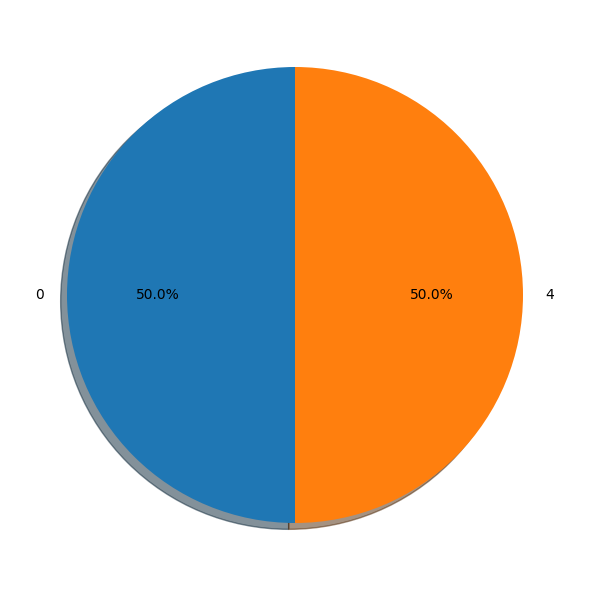

In [5]:
import matplotlib.pyplot as plt
plt.style.use('default') #specially for dark theme

pie=data.target.value_counts(dropna=False)
pie=pd.DataFrame(pie)
display(pie)


plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 1)

axes.pie(pie.target, 
         labels=pie.index, 
         normalize=True,
         autopct='%1.1f%%',
         shadow=True,
         startangle=90)

display(data.target.value_counts(normalize=True))

# B- Preprocessing

## cleaning / stopwords / lemmatization / vocabulary

In [5]:
#https://inside-machinelearning.com/preprocessing-nlp-tutoriel-pour-nettoyer-rapidement-un-texte/
#https://towardsdatascience.com/text-normalization-with-spacy-and-nltk-1302ff430119

import regex as re #module regex
import nltk
import string
from nltk.stem import WordNetLemmatizer
#tous les dictionnaires: https://www.nltk.org/nltk_data/
from nltk.corpus import words


 #DL des stopwords NLTK
#nltk.download('stopwords')
 #DL des punctuations NLTK
#nltk.download('punkt')
 #DL du dictionnaire de mots anglais NTLK
#nltk.download('words')
 #DL pour la lemmatization
#nltk.download('wordnet')


#stopwords anglais
#attention les stopwords n'est pas une liste absolue
stopwords = nltk.corpus.stopwords.words('english')
more_stopwords = ['us', 'im', 'c', "youd", "hadnt", 
                  "hasnt", "havent", "isnt","might", "mightnt", "mustnt", "neednt", 
                  "shant", "shouldnt", "wasnt", "werent", "wont", "wouldnt",
                  "youre","yourent", "youve", "youvent", "youll", "shes","shesnt" "thatll",
                  'cant','wont',"dont", "shouldve",'aint',"arent","couldnt","didnt", "doesnt","thats","shoulda"]
stopwords = stopwords + more_stopwords


#mots anglais du dictionnaire NLTK
#tous les dictionnaires: https://www.nltk.org/nltk_data/
#set() permet d'avoir un mot unique
words = set(nltk.corpus.words.words())
#words = set(nltk.corpus.brown.words())

wnl = WordNetLemmatizer()

def Preprocess_npl(listofdoc):
    '''cleaning + lemmatization
    sub=substitute'''
    preprocess_list_1 = []
    preprocess_list_2 = []
    preprocess_list_3 = []
    for doc in listofdoc :
        #remove text in square brackets: .(any caracter) * (0 or more times) ?\] (0 or 1 time ']')
        doc = re.sub('\[.*?\]', '', doc)
        #remove links
        doc = re.sub('https?://\S+|www\.\S+', '', doc)
        doc = re.sub('http?://\S+|www\.\S+', '', doc)
        ##remove text in angle brackets
        doc = re.sub('<.*?>+', '', doc)
        #remove punctuation
        #!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
        #doc = re.sub('[%s]' % re.escape(string.punctuation), '', doc)
        #remove back line
        doc = re.sub('\n', '', doc)
        #word cracter digit word caracter
        #doc = re.sub('\w*\d\w*', '', doc)
        #remove special carcter comme  ♫
        doc = re.sub('\p{S}', '', doc)
    
        #la fonction join permet de creer un separateur
        #lowercase & remove punctuation : example: Don't->dont
        doc_wo_punct = "".join([i.lower() for i in doc if i not in string.punctuation])
        #remove number
        doc_wo_num = ''.join(i for i in doc_wo_punct if not i.isdigit())
        #tokenization
        token_doc = nltk.tokenize.word_tokenize(doc_wo_num)
        #remove stopwords
        words_wo_stopwords = [w for w in token_doc if w not in stopwords]
        
        #lemmatization
        #attention ici on cree un generateur et non une liste: (wnl.lemmatize(w) for w in words_wo_stopwords) different de [wnl.lemmatize(w) for w in words_wo_stopwords]
        #la difference et qu on recupere à la demande
        #https://stackoverflow.com/questions/47789/generator-expressions-vs-list-comprehensions
        words_lemmatize = [wnl.lemmatize(w) for w in words_wo_stopwords]
        
        #on ne retourne que les mots appartenant au dictionnaire words  et ne possédant pas autre chose que des carcatère de l'alphabet
        doc_clean_1 = ' '.join(w for w in words_wo_stopwords )
        doc_clean_2 = ' '.join(w for w in words_lemmatize)
        doc_clean_3 = ' '.join(w for w in words_lemmatize if w.lower() in words or not w.isalpha())
        
        preprocess_list_1.append(doc_clean_1)
        preprocess_list_2.append(doc_clean_2)
        preprocess_list_3.append(doc_clean_3)
    return preprocess_list_1, preprocess_list_2, preprocess_list_3


start = time.time()
data['text_sw'],data['text_swlem'],data['text_swlemdic'] =Preprocess_npl(data.text)
print(time.time()-start)

271.4627571105957


## stemming qui ne sera pas utilisé par la suite

In [7]:
#https://stackoverflow.com/questions/10554052/what-are-the-major-differences-and-benefits-of-porter-and-lancaster-stemming-alg
from nltk.stem.porter import PorterStemmer #less aggressive
from nltk.stem.snowball import SnowballStemmer #kind of Porter2 (probably first choice) :0.78sec pour 1000
from nltk.stem.lancaster import LancasterStemmer #most aggressive
from nltk.stem import WordNetLemmatizer #fast
#nltk.download('wordnet')

def stemm_data(data,colin,colout,typ,algo):
    '''type: stemmer/lemmatizer
        stemmer algo: 
            nltk.PorterStemmer()
            nltk.SnowballStemmer("english")
            nltk.LancasterStemmer()
        lemme algo:
            nltk.WordNetLemmatizer()
            '''
    if typ=='stemmer':
        stemmer = algo
        def stemm_text(text):
            text = ' '.join(stemmer.stem(word) for word in text.split(' '))
            return text
    elif typ=='lemmatizer':
        lemmatizer = algo
        def stemm_text(text):
            text = ' '.join(lemmatizer.lemmatize(word) for word in text.split(' '))
            return text
        
    data[colout] = data[colin].apply(stemm_text)
    return data


#start = time.time()
#revfilt=stemm_data(data=revfilt,colin='text4',colout='lemm',typ='lemmatizer',algo=nltk.WordNetLemmatizer())
#print(time.time()-start)

start = time.time()
data=stemm_data(data=data,colin='text_swlemdic',colout='text_stemm',typ='stemmer',algo=nltk.SnowballStemmer("english"))
print(time.time()-start)


88.73053765296936


In [21]:
pd.options.display.max_colwidth = 50
data

,target,id,date,flag,user,text,text_sw,text_swlem,text_swlemdic,text_stemm
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot awww bummer got david carr third day,switchfoot awww bummer got david carr third day,bummer got carr third day,bummer got carr third day
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset update facebook texting cry result schoo...,upset update facebook texting cry result schoo...,upset update cry result school today also blah,upset updat cri result school today also blah
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dived many times ball managed save re...,kenichan dived many time ball managed save res...,many time ball save rest go bound,mani time ball save rest go bound
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire,whole body feel itchy like fire,whole body feel itchy like fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving mad see,nationwideclass behaving mad see,mad see,mad see
...,...,...,...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,woke school best feeling ever,woke school best feeling ever,woke school best feeling ever,woke school best feel ever
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,thewdbcom cool hear old walt interviews,thewdbcom cool hear old walt interview,cool hear old walt interview,cool hear old walt interview
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,ready mojo makeover ask details,ready mojo makeover ask detail,ready mojo ask detail,readi mojo ask detail
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,happy th birthday boo alll time tupac amaru sh...,happy th birthday boo alll time tupac amaru sh...,happy th birthday boo time,happi th birthday boo time


## KERAS PREPROCESSING : tokenization -> dictionnaire -> sequence -> padding

In [9]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

start = time.time()
#initialisation de la tokenization avec les 2500 mots les plus fréquents
tokenizer = Tokenizer(num_words=2500, lower=True,split=' ')

#update du dictionnaire de vocabulaire de tokenization #obligatoire
tokenizer.fit_on_texts(data['text_swlemdic'].values)
#taille du dictionnaire
vocab_size = len(tokenizer.word_index) + 1

#transformation des docs en sequences d'entiers correpondant à un mot
X = tokenizer.texts_to_sequences(data['text_swlemdic'].values)

#padding des sequences de facons à ce qu'elles fassent toute la même taille
#par defaut pad en pre (debut de sequence) mais on peut le mettre en post (fin de sequence)
X = pad_sequences(X)
print(time.time()-start)
print (X.shape)

27.82305097579956
(1596630, 25)


# C- WORDS EMBEDDINGS
## chargement des modèles préentrainés et creation des weight matrix

In [10]:
#dezipage
import gzip
import shutil

#with gzip.open('embedding/GoogleNews-vectors-negative300.bin.gz', 'rb') as f_in:
#    with open('embedding/GoogleNews-vectors-negative300.bin', 'wb') as f_out:
#        shutil.copyfileobj(f_in, f_out)


In [11]:
import numpy as np

def load_we(filename,header=False):
    start = time.time()
    embeddings_index = dict()
    

    with open(filename, 'r', encoding='utf-8') as f:
        for c,line in enumerate(f):
            #split chaque ligne en list
            values = line.split()
            #clé=1er terme
            word = values[0]
            #coef=les autres termes de la ligne
            coefs = np.asarray(values[1:], dtype='float32')
            #definition du dict
            if (header==False or c>0):
                embeddings_index[word] = coefs
    print(time.time()-start)
    return embeddings_index

#glove50d_=load_we('embedding/glove.6B/glove.6B.50d.txt',header=False)
#glove100d_=load_we('embedding/glove.6B/glove.6B.100d.txt',header=False)
#fast300d_=load_we('embedding/wiki-news-300d-1M.vec/wiki-news-300d-1M.vec',header=True)

#print('glove50d_ Loaded %s word vectors.' % len(glove50d_))
#print('glove100d_ Loaded %s word vectors.' % len(glove100d_))
#print('fast300d_ Loaded %s word vectors.' % len(fast300d_))

In [12]:
from gensim.models import KeyedVectors #pour lecture word emb

#glove
start = time.time()
glove50d = KeyedVectors.load_word2vec_format('embedding/glove.6B/glove.6B.50d.txt', binary=False, no_header=True)
print(time.time()-start)
start = time.time()
glove100d = KeyedVectors.load_word2vec_format('embedding/glove.6B/glove.6B.100d.txt', binary=False, no_header=True)
print(time.time()-start)
#google word2vec
start = time.time()
word2vec300d = KeyedVectors.load_word2vec_format('embedding/GoogleNews-vectors-negative300.bin', binary=True, no_header=False)
print(time.time()-start)
#fasttext
start = time.time()
fast300d = KeyedVectors.load_word2vec_format('embedding/wiki-news-300d-1M.vec/wiki-news-300d-1M.vec', binary=False, no_header=False)
print(time.time()-start)

10.536900281906128
18.904566526412964
20.753058671951294
123.81116914749146


In [13]:
#how to access word vector after keyed vectors
#glove50d['computer']
#glove50d.get_vector('computer', norm=False)
#full
#glove50d_vec=glove50d.get_normed_vectors()

In [14]:
# create a weight matrix for words in training docs
def we2matrix(tokenizer, we_kv, we_dim, normalization=False):
    start = time.time()
    #taille du vocabulaire du keras tokenizer fitté sur nos datas
    vocab_size = len(tokenizer.word_index) + 1
    #initialisation de la matrice à 0
    embedding_matrix = np.zeros((vocab_size, we_dim))
    #compteur de mot non matché
    count_nm=0
    
    #recuperation des vecteurs pour le dictionnaire du keras tokenizer fitté sur nos datas
    for word, i in tokenizer.word_index.items():
        try:
            embedding_vector = we_kv.get_vector(word, norm=normalization)
        except:
            count_nm=count_nm+1
            #on passe à la prochaine iteration de la boucle
            continue
        #on modifie la matrice que si on a un terme sinon ca reste à 0
        embedding_matrix[i] = embedding_vector
            
    #pourcentage final de mots non matchés       
    nm=count_nm/vocab_size
    print(time.time()-start)
    print('pct non matché:', "{:.2f}".format(nm))
    return embedding_matrix

glove50d_matrix=we2matrix(tokenizer, glove50d, 50, normalization=False)
glove100d_matrix=we2matrix(tokenizer, glove100d, 100, normalization=False)
word2vec300d_matrix=we2matrix(tokenizer, word2vec300d, 300, normalization=False)
fast300d_matrix=we2matrix(tokenizer, fast300d, 300, normalization=False)

0.04728507995605469
pct non matché: 0.13
0.062485456466674805
pct non matché: 0.13
0.06297469139099121
pct non matché: 0.15
0.06293964385986328
pct non matché: 0.12


# D- Modèle LSTM
## 1-a creation du modèle KERAS

In [88]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras import backend

#clear keras session
backend.clear_session()


#taille du vocabulaire /dim du we/ we matrix
vocab_size=len(tokenizer.word_index) + 1
embed_dim=50
embedding_matrix=glove50d_matrix

#taille du vecteur de sortie / nb de neurones
lstm_out=50

# define model
model1 = Sequential()
# couche embedding non entrainable
#pas besoin de faire de drop out de regularisation a ce niveau la car on c'est deja pré-entrainé
model1.add(Embedding(vocab_size, embed_dim, weights=[embedding_matrix], input_length=X.shape[1], trainable=False))

#ajout d'une couche LSTM (mémoire) avec regularisation dropout
model1.add(LSTM(lstm_out))#, dropout=0.1, recurrent_dropout=0.1))
#fully connected de sortie 2D
model1.add(Dense(2,activation='softmax'))
#complilation
model1.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
# summarize the model
print('model1',model1.summary())

#############################################
embed_dim=100
embedding_matrix=glove100d_matrix
lstm_out=100

model2 = Sequential()
model2.add(Embedding(vocab_size, embed_dim, weights=[embedding_matrix], input_length=X.shape[1], trainable=False))
model2.add(LSTM(lstm_out))#, dropout=0.1, recurrent_dropout=0.1))
model2.add(Dense(2,activation='softmax'))
model2.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print('model2',model2.summary())

#############################################
embed_dim=300
embedding_matrix=word2vec300d_matrix
lstm_out=300

model3 = Sequential()
model3.add(Embedding(vocab_size, embed_dim, weights=[embedding_matrix], input_length=X.shape[1], trainable=False))
model3.add(LSTM(lstm_out))#, dropout=0.1, recurrent_dropout=0.1))
model3.add(Dense(2,activation='softmax'))
model3.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print('model3',model3.summary())

#############################################
embed_dim=300
embedding_matrix=fast300d_matrix
lstm_out=300

model4 = Sequential()
model4.add(Embedding(vocab_size, embed_dim, weights=[embedding_matrix], input_length=X.shape[1], trainable=False))
model4.add(LSTM(lstm_out))#, dropout=0.1, recurrent_dropout=0.1))
model4.add(Dense(2,activation='softmax'))
model4.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print('model4',model4.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 50)            1672500   
                                                                 
 lstm (LSTM)                 (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 1,692,802
Trainable params: 20,302
Non-trainable params: 1,672,500
_________________________________________________________________
model1 None
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 25, 100)           3345000   
                                                                 
 lstm_1

## 1-b split train/test dataset sur un petit jeu de données  de 10000 tweets

In [51]:
from sklearn.model_selection import train_test_split

#creation des dummies pour le label/target
Y = pd.get_dummies(data['target']).values

#split 1.6M->10000 :test_size = 0.006263
X1, X2, y1, y2 = train_test_split(X,Y, test_size = 0.006263, random_state = 36, stratify=Y)

#split train / test sur les 10000
X_train, X_test, y_train, y_test = train_test_split(X2,y2, test_size = 0.2, random_state = 36, stratify=y2)

## 1-c training 10000

In [52]:
#Here we train the Network.
batch_size= 32

model_info_1=model1.fit(X_train, y_train, batch_size =batch_size,validation_split=0.2, epochs = 10,  verbose = 2)
print(model_info_1.history.keys())

model_info_2=model2.fit(X_train, y_train, batch_size =batch_size,validation_split=0.2, epochs = 10,  verbose = 2)
print(model_info_2.history.keys())

model_info_3=model3.fit(X_train, y_train, batch_size =batch_size,validation_split=0.2, epochs = 10,  verbose = 2)
print(model_info_3.history.keys())

model_info_4=model4.fit(X_train, y_train, batch_size =batch_size,validation_split=0.2, epochs = 10,  verbose = 2)
print(model_info_4.history.keys())

Epoch 1/10
200/200 - 13s - loss: 0.6544 - accuracy: 0.6116 - val_loss: 0.6305 - val_accuracy: 0.6456 - 13s/epoch - 66ms/step
Epoch 2/10
200/200 - 11s - loss: 0.6217 - accuracy: 0.6548 - val_loss: 0.6191 - val_accuracy: 0.6513 - 11s/epoch - 54ms/step
Epoch 3/10
200/200 - 12s - loss: 0.6058 - accuracy: 0.6716 - val_loss: 0.5943 - val_accuracy: 0.6775 - 12s/epoch - 62ms/step
Epoch 4/10
200/200 - 11s - loss: 0.5931 - accuracy: 0.6791 - val_loss: 0.5973 - val_accuracy: 0.6750 - 11s/epoch - 56ms/step
Epoch 5/10
200/200 - 11s - loss: 0.5826 - accuracy: 0.6894 - val_loss: 0.5863 - val_accuracy: 0.6862 - 11s/epoch - 57ms/step
Epoch 6/10
200/200 - 12s - loss: 0.5714 - accuracy: 0.6969 - val_loss: 0.5851 - val_accuracy: 0.6963 - 12s/epoch - 59ms/step
Epoch 7/10
200/200 - 12s - loss: 0.5583 - accuracy: 0.7056 - val_loss: 0.5894 - val_accuracy: 0.6981 - 12s/epoch - 59ms/step
Epoch 8/10
200/200 - 12s - loss: 0.5482 - accuracy: 0.7161 - val_loss: 0.5901 - val_accuracy: 0.6950 - 12s/epoch - 58ms/step


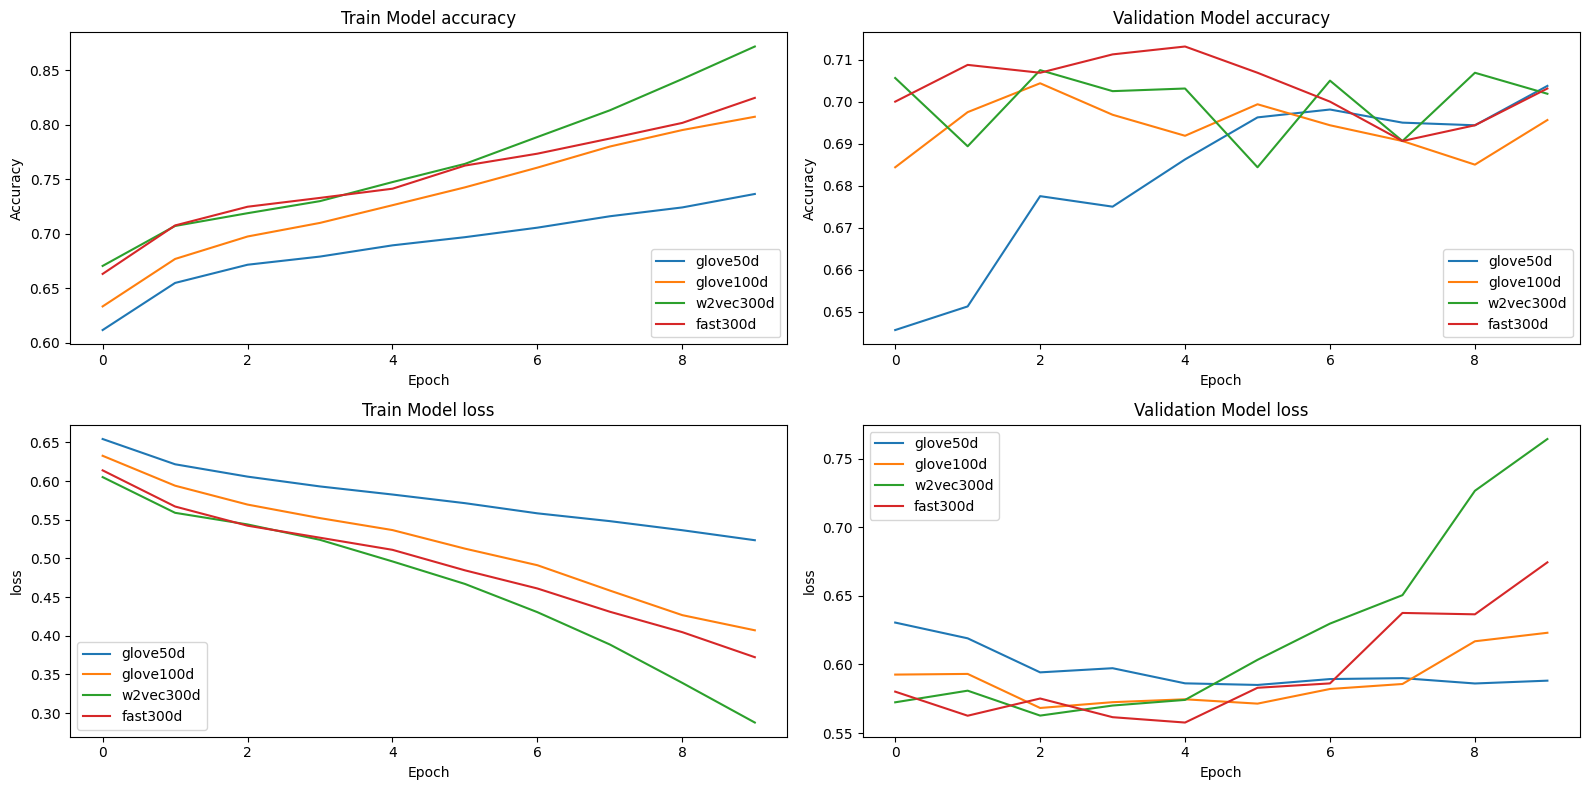

In [58]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [16, 8]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(2, 2)

# Plot training & validation accuracy values
axes[0,0].plot(model_info_1.history['accuracy'])
axes[0,0].plot(model_info_2.history['accuracy'])
axes[0,0].plot(model_info_3.history['accuracy'])
axes[0,0].plot(model_info_4.history['accuracy'])
axes[0,0].set_title('Train Model accuracy / ')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].set_xlabel('Epoch')
axes[0,0].legend(['glove50d','glove100d','w2vec300d','fast300d'], loc='lower right')

axes[0,1].plot(model_info_1.history['val_accuracy'])
axes[0,1].plot(model_info_2.history['val_accuracy'])
axes[0,1].plot(model_info_3.history['val_accuracy'])
axes[0,1].plot(model_info_4.history['val_accuracy'])
axes[0,1].set_title('Validation Model accuracy')
axes[0,1].set_ylabel('Accuracy')
axes[0,1].set_xlabel('Epoch')
axes[0,1].legend(['glove50d','glove100d','w2vec300d','fast300d'], loc='lower right')

axes[1,0].plot(model_info_1.history['loss'])
axes[1,0].plot(model_info_2.history['loss'])
axes[1,0].plot(model_info_3.history['loss'])
axes[1,0].plot(model_info_4.history['loss'])
axes[1,0].set_title('Train Model loss')
axes[1,0].set_ylabel('loss')
axes[1,0].set_xlabel('Epoch')
axes[1,0].legend(['glove50d','glove100d','w2vec300d','fast300d'], loc='lower left')

axes[1,1].plot(model_info_1.history['val_loss'])
axes[1,1].plot(model_info_2.history['val_loss'])
axes[1,1].plot(model_info_3.history['val_loss'])
axes[1,1].plot(model_info_4.history['val_loss'])
axes[1,1].set_title('Validation Model loss')
axes[1,1].set_ylabel('loss')
axes[1,1].set_xlabel('Epoch')
axes[1,1].legend(['glove50d','glove100d','w2vec300d','fast300d'], loc='upper left')

plt.show()



In [63]:
# Measuring score and accuracy on validation set

score1,acc1 = model1.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("Model with glove 50d: Logloss score: %.2f" % (score1)," - Test set Accuracy: %.2f" % (acc1))
score2,acc2 = model2.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("Model with glove 100d: Logloss score: %.2f" % (score2)," - Test set Accuracy: %.2f" % (acc2))

score3,acc3 = model3.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("Model with word2vec 300d: Logloss score: %.2f" % (score3)," - Test set Accuracy: %.2f" % (acc3))
score4,acc4 = model4.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("Model with fasttext 300d: Logloss score: %.2f" % (score4)," - Test set Accuracy: %.2f" % (acc4))

63/63 - 1s - loss: 0.5862 - accuracy: 0.6895 - 868ms/epoch - 14ms/step
Model with glove 50d: Logloss score: 0.59  - Test set Accuracy: 0.69
63/63 - 1s - loss: 0.6395 - accuracy: 0.7015 - 815ms/epoch - 13ms/step
Model with glove 100d: Logloss score: 0.64  - Test set Accuracy: 0.70
63/63 - 1s - loss: 0.8089 - accuracy: 0.6740 - 958ms/epoch - 15ms/step
Model with word2vec 300d: Logloss score: 0.81  - Test set Accuracy: 0.67
63/63 - 1s - loss: 0.6524 - accuracy: 0.7040 - 957ms/epoch - 15ms/step
Model with fasttext 300d: Logloss score: 0.65  - Test set Accuracy: 0.70


## 1-d avec un earlystopping sur val_loss

In [66]:
from keras import callbacks

callback1=callbacks.EarlyStopping(monitor="val_loss",patience=5,mode="auto",restore_best_weights=True)
callback2=callbacks.EarlyStopping(monitor="val_loss",patience=5,mode="auto",restore_best_weights=True)
callback3=callbacks.EarlyStopping(monitor="val_loss",patience=5,mode="auto",restore_best_weights=True)
callback4=callbacks.EarlyStopping(monitor="val_loss",patience=5,mode="auto",restore_best_weights=True)

#ne pas ooublier de clearer et recompiler les modèles plus haut

#Here we train the Network.
batch_size= 32

model_info_1=model1.fit(X_train, y_train, batch_size =batch_size,validation_split=0.2, epochs = 50, callbacks=[callback1],  verbose = 2)
print(model_info_1.history.keys())

model_info_2=model2.fit(X_train, y_train, batch_size =batch_size,validation_split=0.2, epochs = 50, callbacks=[callback2],  verbose = 2)
print(model_info_2.history.keys())

model_info_3=model3.fit(X_train, y_train, batch_size =batch_size,validation_split=0.2, epochs = 50, callbacks=[callback3],  verbose = 2)
print(model_info_3.history.keys())

model_info_4=model4.fit(X_train, y_train, batch_size =batch_size,validation_split=0.2, epochs = 50, callbacks=[callback4],  verbose = 2)
print(model_info_4.history.keys())

Epoch 1/50
200/200 - 13s - loss: 0.6536 - accuracy: 0.6081 - val_loss: 0.6189 - val_accuracy: 0.6694 - 13s/epoch - 63ms/step
Epoch 2/50
200/200 - 11s - loss: 0.6231 - accuracy: 0.6530 - val_loss: 0.6065 - val_accuracy: 0.6731 - 11s/epoch - 57ms/step
Epoch 3/50
200/200 - 12s - loss: 0.6096 - accuracy: 0.6720 - val_loss: 0.5999 - val_accuracy: 0.6694 - 12s/epoch - 60ms/step
Epoch 4/50
200/200 - 12s - loss: 0.5947 - accuracy: 0.6814 - val_loss: 0.5965 - val_accuracy: 0.6787 - 12s/epoch - 59ms/step
Epoch 5/50
200/200 - 12s - loss: 0.5859 - accuracy: 0.6900 - val_loss: 0.5883 - val_accuracy: 0.6875 - 12s/epoch - 60ms/step
Epoch 6/50
200/200 - 11s - loss: 0.5716 - accuracy: 0.6995 - val_loss: 0.6028 - val_accuracy: 0.6844 - 11s/epoch - 57ms/step
Epoch 7/50
200/200 - 12s - loss: 0.5604 - accuracy: 0.7083 - val_loss: 0.5891 - val_accuracy: 0.6844 - 12s/epoch - 58ms/step
Epoch 8/50
200/200 - 12s - loss: 0.5493 - accuracy: 0.7184 - val_loss: 0.5846 - val_accuracy: 0.6869 - 12s/epoch - 60ms/step


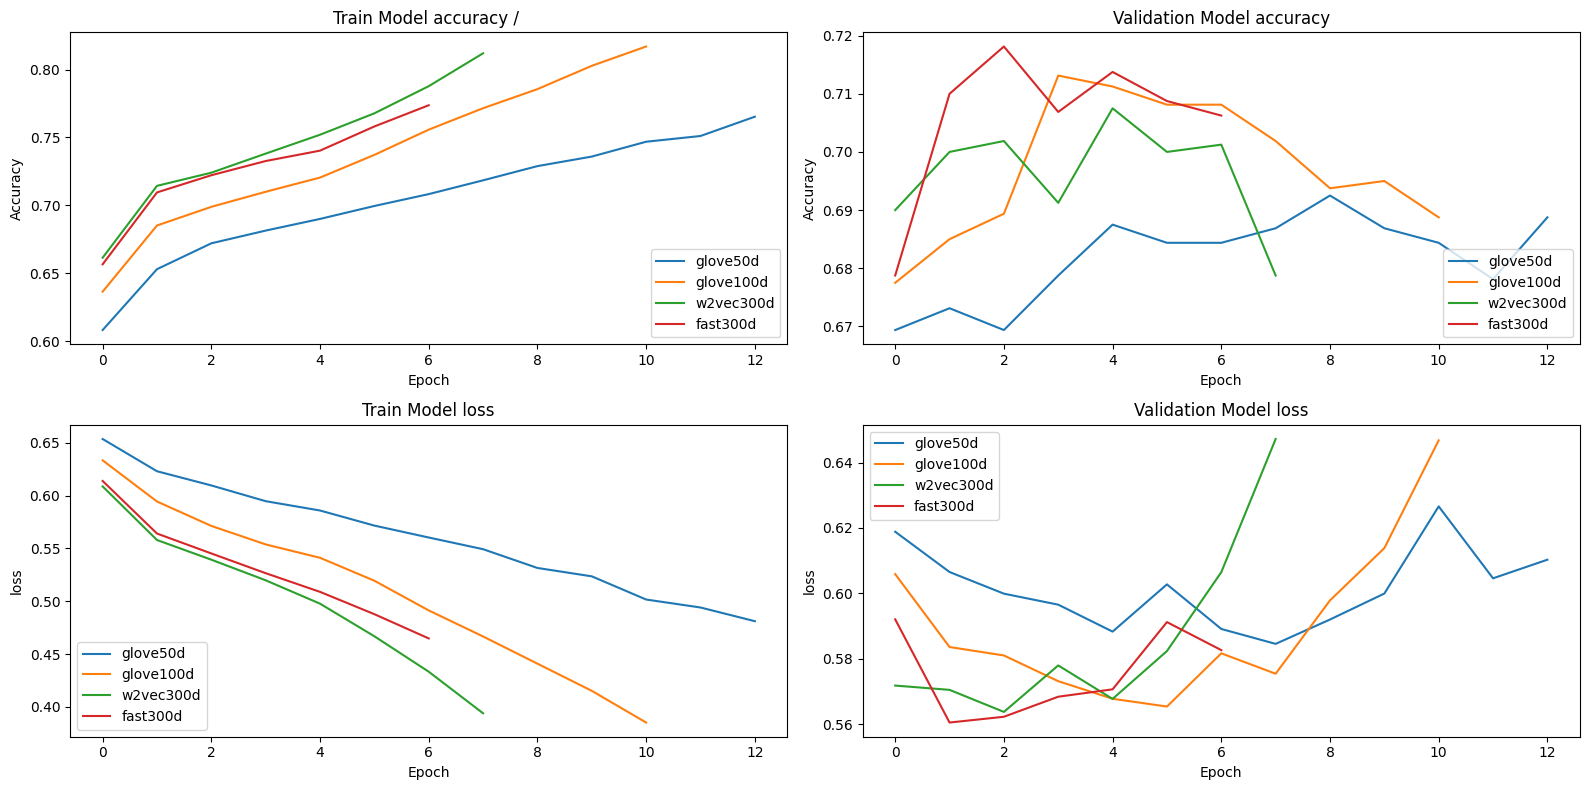

In [67]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [16, 8]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(2, 2)

# Plot training & validation accuracy values
axes[0,0].plot(model_info_1.history['accuracy'])
axes[0,0].plot(model_info_2.history['accuracy'])
axes[0,0].plot(model_info_3.history['accuracy'])
axes[0,0].plot(model_info_4.history['accuracy'])
axes[0,0].set_title('Train Model accuracy / ')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].set_xlabel('Epoch')
axes[0,0].legend(['glove50d','glove100d','w2vec300d','fast300d'], loc='lower right')

axes[0,1].plot(model_info_1.history['val_accuracy'])
axes[0,1].plot(model_info_2.history['val_accuracy'])
axes[0,1].plot(model_info_3.history['val_accuracy'])
axes[0,1].plot(model_info_4.history['val_accuracy'])
axes[0,1].set_title('Validation Model accuracy')
axes[0,1].set_ylabel('Accuracy')
axes[0,1].set_xlabel('Epoch')
axes[0,1].legend(['glove50d','glove100d','w2vec300d','fast300d'], loc='lower right')

axes[1,0].plot(model_info_1.history['loss'])
axes[1,0].plot(model_info_2.history['loss'])
axes[1,0].plot(model_info_3.history['loss'])
axes[1,0].plot(model_info_4.history['loss'])
axes[1,0].set_title('Train Model loss')
axes[1,0].set_ylabel('loss')
axes[1,0].set_xlabel('Epoch')
axes[1,0].legend(['glove50d','glove100d','w2vec300d','fast300d'], loc='lower left')

axes[1,1].plot(model_info_1.history['val_loss'])
axes[1,1].plot(model_info_2.history['val_loss'])
axes[1,1].plot(model_info_3.history['val_loss'])
axes[1,1].plot(model_info_4.history['val_loss'])
axes[1,1].set_title('Validation Model loss')
axes[1,1].set_ylabel('loss')
axes[1,1].set_xlabel('Epoch')
axes[1,1].legend(['glove50d','glove100d','w2vec300d','fast300d'], loc='upper left')

plt.show()

In [68]:
# Measuring score and accuracy on validation set

score1,acc1 = model1.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("Model with glove 50d: Logloss score: %.2f" % (score1)," - Test set Accuracy: %.2f" % (acc1))
score2,acc2 = model2.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("Model with glove 100d: Logloss score: %.2f" % (score2)," - Test set Accuracy: %.2f" % (acc2))

score3,acc3 = model3.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("Model with word2vec 300d: Logloss score: %.2f" % (score3)," - Test set Accuracy: %.2f" % (acc3))
score4,acc4 = model4.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("Model with fasttext 300d: Logloss score: %.2f" % (score4)," - Test set Accuracy: %.2f" % (acc4))

63/63 - 1s - loss: 0.5860 - accuracy: 0.6855 - 1s/epoch - 17ms/step
Model with glove 50d: Logloss score: 0.59  - Test set Accuracy: 0.69
63/63 - 1s - loss: 0.5744 - accuracy: 0.7000 - 994ms/epoch - 16ms/step
Model with glove 100d: Logloss score: 0.57  - Test set Accuracy: 0.70
63/63 - 1s - loss: 0.5635 - accuracy: 0.7075 - 1s/epoch - 18ms/step
Model with word2vec 300d: Logloss score: 0.56  - Test set Accuracy: 0.71
63/63 - 1s - loss: 0.5655 - accuracy: 0.7105 - 1s/epoch - 18ms/step
Model with fasttext 300d: Logloss score: 0.57  - Test set Accuracy: 0.71


## 2-a on rajoute une 2eme layer de LSTM pour voir

In [71]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras import backend

#clear keras session
backend.clear_session()


#taille du vocabulaire /dim du we/ we matrix
vocab_size=len(tokenizer.word_index) + 1
embed_dim=50
embedding_matrix=glove50d_matrix

#taille du vecteur de sortie / nb de neurones
lstm_out=50

# define model
model1 = Sequential()
# couche embedding non entrainable
#pas besoin de faire de drop out de regularisation a ce niveau la car on c'est deja pré-entrainé
model1.add(Embedding(vocab_size, embed_dim, weights=[embedding_matrix], input_length=X.shape[1], trainable=False))

#ajout d'une couche LSTM (mémoire) avec regularisation dropout
model1.add(LSTM(lstm_out, dropout=0.1, recurrent_dropout=0.1,return_sequences=True))
model1.add(LSTM(lstm_out, dropout=0.1, recurrent_dropout=0.1))
#fully connected de sortie 2D
model1.add(Dense(2,activation='softmax'))
#complilation
model1.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
# summarize the model
print('model1',model1.summary())

#############################################
embed_dim=100
embedding_matrix=glove100d_matrix
lstm_out=100

model2 = Sequential()
model2.add(Embedding(vocab_size, embed_dim, weights=[embedding_matrix], input_length=X.shape[1], trainable=False))
model2.add(LSTM(lstm_out, dropout=0.1, recurrent_dropout=0.1,return_sequences=True))
model2.add(LSTM(lstm_out, dropout=0.1, recurrent_dropout=0.1))
model2.add(Dense(2,activation='softmax'))
model2.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print('model2',model2.summary())

#############################################
embed_dim=300
embedding_matrix=word2vec300d_matrix
lstm_out=300

model3 = Sequential()
model3.add(Embedding(vocab_size, embed_dim, weights=[embedding_matrix], input_length=X.shape[1], trainable=False))
model3.add(LSTM(lstm_out, dropout=0.1, recurrent_dropout=0.1,return_sequences=True))
model3.add(LSTM(lstm_out, dropout=0.1, recurrent_dropout=0.1))
model3.add(Dense(2,activation='softmax'))
model3.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print('model3',model3.summary())

#############################################
embed_dim=300
embedding_matrix=fast300d_matrix
lstm_out=300

model4 = Sequential()
model4.add(Embedding(vocab_size, embed_dim, weights=[embedding_matrix], input_length=X.shape[1], trainable=False))
model4.add(LSTM(lstm_out, dropout=0.1, recurrent_dropout=0.1,return_sequences=True))
model4.add(LSTM(lstm_out, dropout=0.1, recurrent_dropout=0.1))
model4.add(Dense(2,activation='softmax'))
model4.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print('model4',model4.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 50)            1672500   
                                                                 
 lstm (LSTM)                 (None, 25, 50)            20200     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 1,713,002
Trainable params: 40,502
Non-trainable params: 1,672,500
_________________________________________________________________
model1 None
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedd

## 2-b entraintement du modele lstm 2 layers

In [72]:
from keras import callbacks

callback1=callbacks.EarlyStopping(monitor="val_loss",patience=5,mode="auto",restore_best_weights=True)
callback2=callbacks.EarlyStopping(monitor="val_loss",patience=5,mode="auto",restore_best_weights=True)
callback3=callbacks.EarlyStopping(monitor="val_loss",patience=5,mode="auto",restore_best_weights=True)
callback4=callbacks.EarlyStopping(monitor="val_loss",patience=5,mode="auto",restore_best_weights=True)

#ne pas ooublier de clearer et recompiler les modèles plus haut

#Here we train the Network.
batch_size= 32

model_info_1=model1.fit(X_train, y_train, batch_size =batch_size,validation_split=0.2, epochs = 50, callbacks=[callback1],  verbose = 2)
print(model_info_1.history.keys())

model_info_2=model2.fit(X_train, y_train, batch_size =batch_size,validation_split=0.2, epochs = 50, callbacks=[callback2],  verbose = 2)
print(model_info_2.history.keys())

model_info_3=model3.fit(X_train, y_train, batch_size =batch_size,validation_split=0.2, epochs = 50, callbacks=[callback3],  verbose = 2)
print(model_info_3.history.keys())

model_info_4=model4.fit(X_train, y_train, batch_size =batch_size,validation_split=0.2, epochs = 50, callbacks=[callback4],  verbose = 2)
print(model_info_4.history.keys())

Epoch 1/50
200/200 - 28s - loss: 0.6561 - accuracy: 0.6053 - val_loss: 0.6236 - val_accuracy: 0.6656 - 28s/epoch - 139ms/step
Epoch 2/50
200/200 - 23s - loss: 0.6237 - accuracy: 0.6500 - val_loss: 0.6071 - val_accuracy: 0.6781 - 23s/epoch - 117ms/step
Epoch 3/50
200/200 - 23s - loss: 0.6077 - accuracy: 0.6692 - val_loss: 0.5990 - val_accuracy: 0.6812 - 23s/epoch - 113ms/step
Epoch 4/50
200/200 - 23s - loss: 0.5962 - accuracy: 0.6767 - val_loss: 0.5894 - val_accuracy: 0.6812 - 23s/epoch - 117ms/step
Epoch 5/50
200/200 - 23s - loss: 0.5845 - accuracy: 0.6870 - val_loss: 0.6000 - val_accuracy: 0.6850 - 23s/epoch - 114ms/step
Epoch 6/50
200/200 - 24s - loss: 0.5739 - accuracy: 0.6963 - val_loss: 0.5826 - val_accuracy: 0.6994 - 24s/epoch - 119ms/step
Epoch 7/50
200/200 - 24s - loss: 0.5558 - accuracy: 0.7067 - val_loss: 0.6030 - val_accuracy: 0.6687 - 24s/epoch - 119ms/step
Epoch 8/50
200/200 - 23s - loss: 0.5475 - accuracy: 0.7155 - val_loss: 0.5707 - val_accuracy: 0.7050 - 23s/epoch - 116

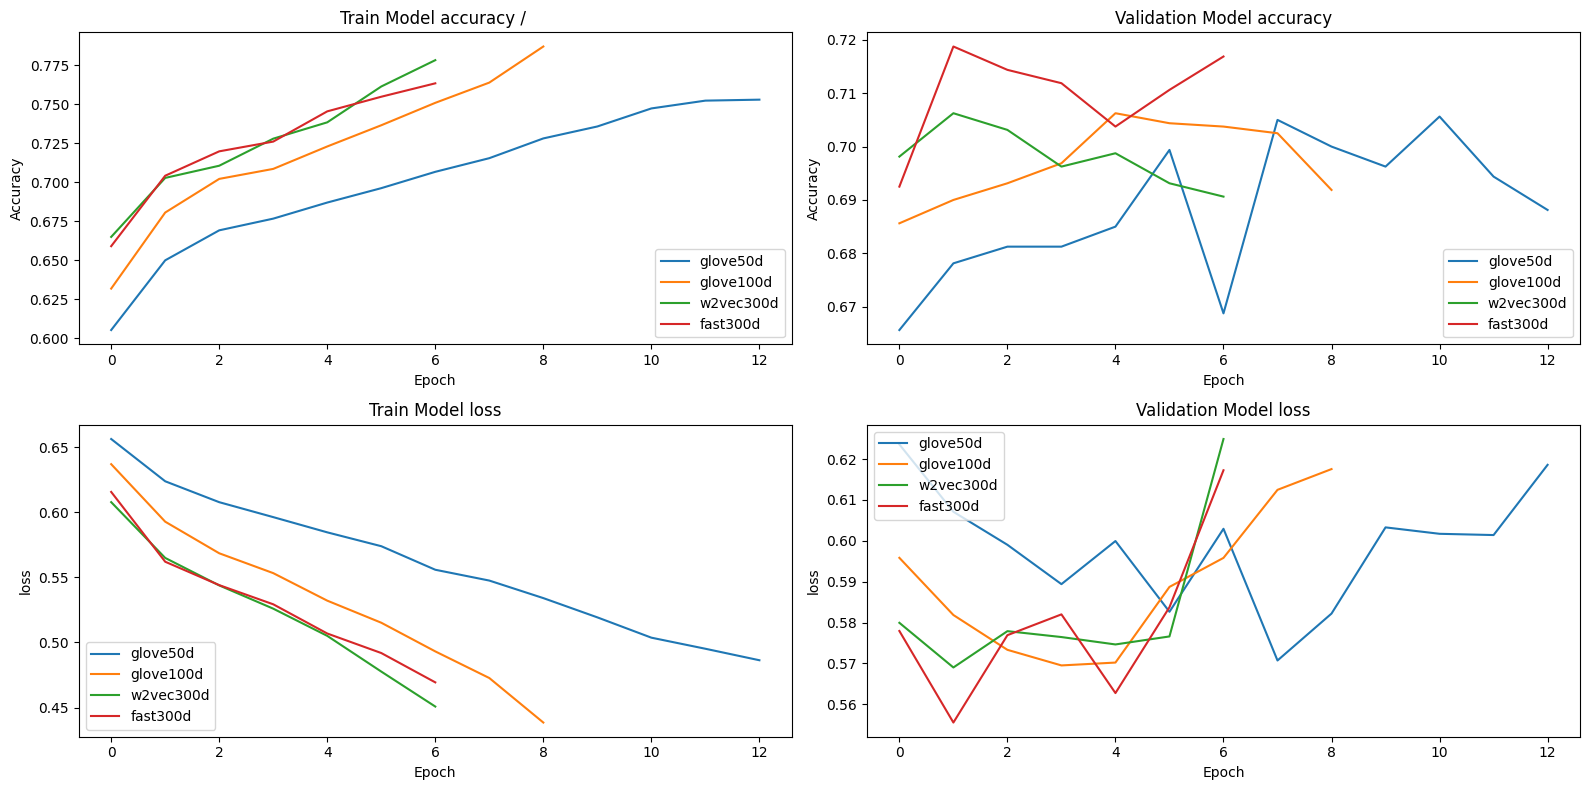

In [73]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [16, 8]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(2, 2)

# Plot training & validation accuracy values
axes[0,0].plot(model_info_1.history['accuracy'])
axes[0,0].plot(model_info_2.history['accuracy'])
axes[0,0].plot(model_info_3.history['accuracy'])
axes[0,0].plot(model_info_4.history['accuracy'])
axes[0,0].set_title('Train Model accuracy / ')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].set_xlabel('Epoch')
axes[0,0].legend(['glove50d','glove100d','w2vec300d','fast300d'], loc='lower right')

axes[0,1].plot(model_info_1.history['val_accuracy'])
axes[0,1].plot(model_info_2.history['val_accuracy'])
axes[0,1].plot(model_info_3.history['val_accuracy'])
axes[0,1].plot(model_info_4.history['val_accuracy'])
axes[0,1].set_title('Validation Model accuracy')
axes[0,1].set_ylabel('Accuracy')
axes[0,1].set_xlabel('Epoch')
axes[0,1].legend(['glove50d','glove100d','w2vec300d','fast300d'], loc='lower right')

axes[1,0].plot(model_info_1.history['loss'])
axes[1,0].plot(model_info_2.history['loss'])
axes[1,0].plot(model_info_3.history['loss'])
axes[1,0].plot(model_info_4.history['loss'])
axes[1,0].set_title('Train Model loss')
axes[1,0].set_ylabel('loss')
axes[1,0].set_xlabel('Epoch')
axes[1,0].legend(['glove50d','glove100d','w2vec300d','fast300d'], loc='lower left')

axes[1,1].plot(model_info_1.history['val_loss'])
axes[1,1].plot(model_info_2.history['val_loss'])
axes[1,1].plot(model_info_3.history['val_loss'])
axes[1,1].plot(model_info_4.history['val_loss'])
axes[1,1].set_title('Validation Model loss')
axes[1,1].set_ylabel('loss')
axes[1,1].set_xlabel('Epoch')
axes[1,1].legend(['glove50d','glove100d','w2vec300d','fast300d'], loc='upper left')

plt.show()

In [74]:
# Measuring score and accuracy on validation set

score1,acc1 = model1.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("Model with glove 50d: Logloss score: %.2f" % (score1)," - Test set Accuracy: %.2f" % (acc1))
score2,acc2 = model2.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("Model with glove 100d: Logloss score: %.2f" % (score2)," - Test set Accuracy: %.2f" % (acc2))

score3,acc3 = model3.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("Model with word2vec 300d: Logloss score: %.2f" % (score3)," - Test set Accuracy: %.2f" % (acc3))
score4,acc4 = model4.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("Model with fasttext 300d: Logloss score: %.2f" % (score4)," - Test set Accuracy: %.2f" % (acc4))

63/63 - 2s - loss: 0.5860 - accuracy: 0.6830 - 2s/epoch - 29ms/step
Model with glove 50d: Logloss score: 0.59  - Test set Accuracy: 0.68
63/63 - 2s - loss: 0.5749 - accuracy: 0.6915 - 2s/epoch - 29ms/step
Model with glove 100d: Logloss score: 0.57  - Test set Accuracy: 0.69
63/63 - 2s - loss: 0.5665 - accuracy: 0.7010 - 2s/epoch - 33ms/step
Model with word2vec 300d: Logloss score: 0.57  - Test set Accuracy: 0.70
63/63 - 2s - loss: 0.5593 - accuracy: 0.7185 - 2s/epoch - 33ms/step
Model with fasttext 300d: Logloss score: 0.56  - Test set Accuracy: 0.72


## 3-a split train/test dataset sur un jeu de données  de 100000 tweets

In [79]:
#on commence par clearer keras et recompiler des modeles 1 layer plus haut

from sklearn.model_selection import train_test_split

#creation des dummies pour le label/target
Y = pd.get_dummies(data['target']).values

#split 1.6M->100000 :test_size = 0.0625
X1, X2, y1, y2 = train_test_split(X,Y, test_size = 0.0625, random_state = 36, stratify=Y)

#split train / test sur les 100000
X_train, X_test, y_train, y_test = train_test_split(X2,y2, test_size = 0.2, random_state = 36, stratify=y2)

## 3-b entrainement avec 100000 données et 1 seule layer 
sans regularisation dropout qui permet d'utiliser cudnn et d'etre 10 fois plus rapide

In [82]:
from keras import callbacks

callback1=callbacks.EarlyStopping(monitor="val_loss",patience=5,mode="auto",restore_best_weights=True)
callback2=callbacks.EarlyStopping(monitor="val_loss",patience=5,mode="auto",restore_best_weights=True)
callback3=callbacks.EarlyStopping(monitor="val_loss",patience=5,mode="auto",restore_best_weights=True)
callback4=callbacks.EarlyStopping(monitor="val_loss",patience=5,mode="auto",restore_best_weights=True)

#ne pas ooublier de clearer et recompiler les modèles plus haut

#Here we train the Network.
batch_size= 32

model_info_1=model1.fit(X_train, y_train, batch_size =batch_size,validation_split=0.2, epochs = 50, callbacks=[callback1],  verbose = 2)
print(model_info_1.history.keys())

model_info_2=model2.fit(X_train, y_train, batch_size =batch_size,validation_split=0.2, epochs = 50, callbacks=[callback2],  verbose = 2)
print(model_info_2.history.keys())

model_info_3=model3.fit(X_train, y_train, batch_size =batch_size,validation_split=0.2, epochs = 50, callbacks=[callback3],  verbose = 2)
print(model_info_3.history.keys())

model_info_4=model4.fit(X_train, y_train, batch_size =batch_size,validation_split=0.2, epochs = 50, callbacks=[callback4],  verbose = 2)
print(model_info_4.history.keys())

Epoch 1/50
1996/1996 - 22s - loss: 0.5962 - accuracy: 0.6754 - val_loss: 0.5769 - val_accuracy: 0.6920 - 22s/epoch - 11ms/step
Epoch 2/50
1996/1996 - 10s - loss: 0.5584 - accuracy: 0.7065 - val_loss: 0.5624 - val_accuracy: 0.7034 - 10s/epoch - 5ms/step
Epoch 3/50
1996/1996 - 10s - loss: 0.5407 - accuracy: 0.7205 - val_loss: 0.5528 - val_accuracy: 0.7097 - 10s/epoch - 5ms/step
Epoch 4/50
1996/1996 - 10s - loss: 0.5288 - accuracy: 0.7286 - val_loss: 0.5477 - val_accuracy: 0.7129 - 10s/epoch - 5ms/step
Epoch 5/50
1996/1996 - 10s - loss: 0.5196 - accuracy: 0.7354 - val_loss: 0.5494 - val_accuracy: 0.7152 - 10s/epoch - 5ms/step
Epoch 6/50
1996/1996 - 10s - loss: 0.5103 - accuracy: 0.7419 - val_loss: 0.5500 - val_accuracy: 0.7174 - 10s/epoch - 5ms/step
Epoch 7/50
1996/1996 - 10s - loss: 0.5025 - accuracy: 0.7479 - val_loss: 0.5523 - val_accuracy: 0.7150 - 10s/epoch - 5ms/step
Epoch 8/50
1996/1996 - 10s - loss: 0.4942 - accuracy: 0.7531 - val_loss: 0.5523 - val_accuracy: 0.7160 - 10s/epoch - 

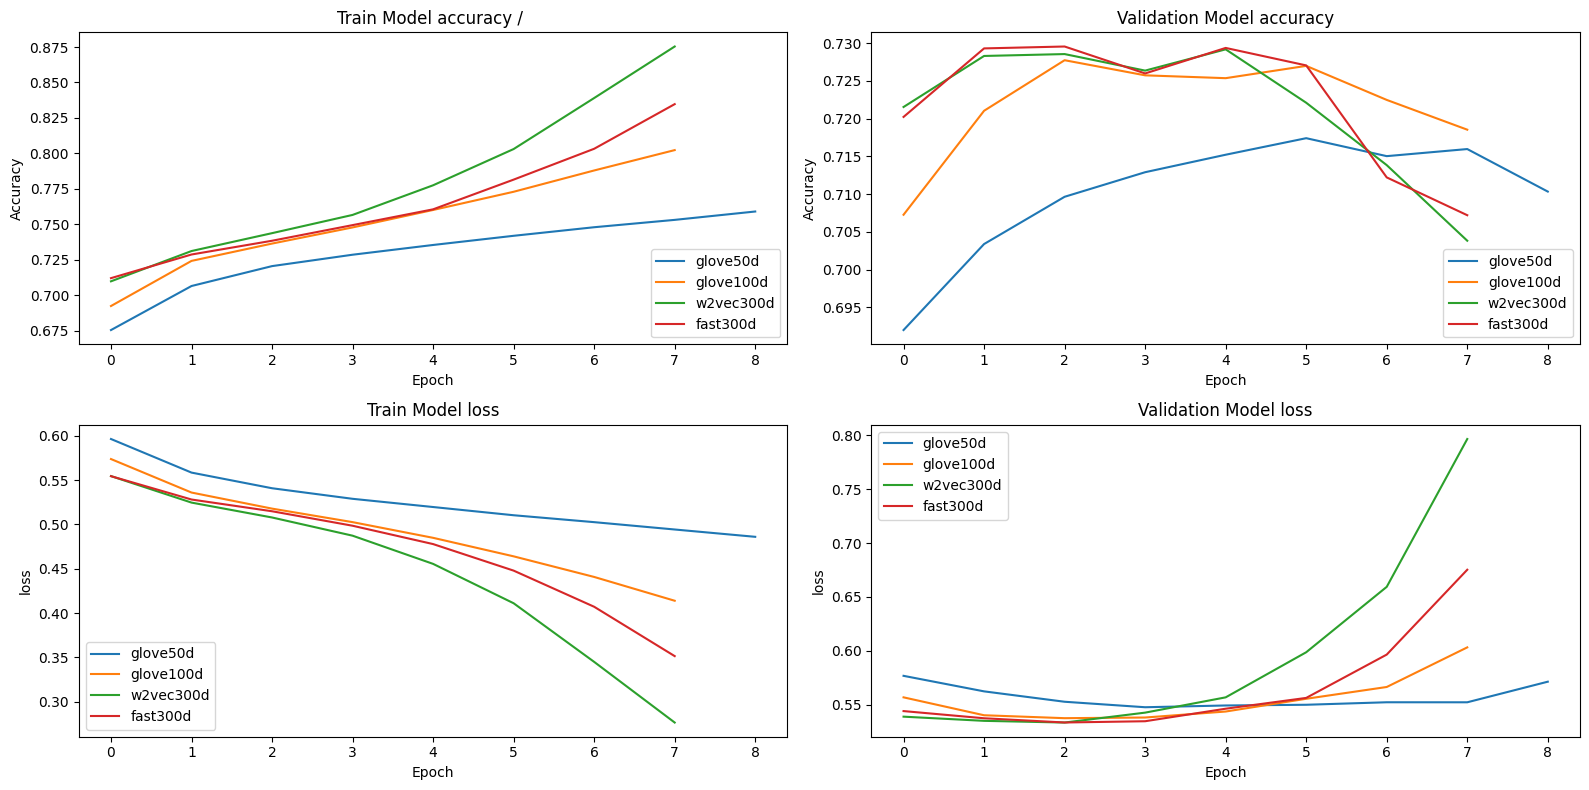

In [83]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [16, 8]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(2, 2)

# Plot training & validation accuracy values
axes[0,0].plot(model_info_1.history['accuracy'])
axes[0,0].plot(model_info_2.history['accuracy'])
axes[0,0].plot(model_info_3.history['accuracy'])
axes[0,0].plot(model_info_4.history['accuracy'])
axes[0,0].set_title('Train Model accuracy / ')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].set_xlabel('Epoch')
axes[0,0].legend(['glove50d','glove100d','w2vec300d','fast300d'], loc='lower right')

axes[0,1].plot(model_info_1.history['val_accuracy'])
axes[0,1].plot(model_info_2.history['val_accuracy'])
axes[0,1].plot(model_info_3.history['val_accuracy'])
axes[0,1].plot(model_info_4.history['val_accuracy'])
axes[0,1].set_title('Validation Model accuracy')
axes[0,1].set_ylabel('Accuracy')
axes[0,1].set_xlabel('Epoch')
axes[0,1].legend(['glove50d','glove100d','w2vec300d','fast300d'], loc='lower right')

axes[1,0].plot(model_info_1.history['loss'])
axes[1,0].plot(model_info_2.history['loss'])
axes[1,0].plot(model_info_3.history['loss'])
axes[1,0].plot(model_info_4.history['loss'])
axes[1,0].set_title('Train Model loss')
axes[1,0].set_ylabel('loss')
axes[1,0].set_xlabel('Epoch')
axes[1,0].legend(['glove50d','glove100d','w2vec300d','fast300d'], loc='lower left')

axes[1,1].plot(model_info_1.history['val_loss'])
axes[1,1].plot(model_info_2.history['val_loss'])
axes[1,1].plot(model_info_3.history['val_loss'])
axes[1,1].plot(model_info_4.history['val_loss'])
axes[1,1].set_title('Validation Model loss')
axes[1,1].set_ylabel('loss')
axes[1,1].set_xlabel('Epoch')
axes[1,1].legend(['glove50d','glove100d','w2vec300d','fast300d'], loc='upper left')

plt.show()

In [84]:
# Measuring score and accuracy on validation set

score1,acc1 = model1.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("Model with glove 50d: Logloss score: %.2f" % (score1)," - Test set Accuracy: %.2f" % (acc1))
score2,acc2 = model2.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("Model with glove 100d: Logloss score: %.2f" % (score2)," - Test set Accuracy: %.2f" % (acc2))

score3,acc3 = model3.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("Model with word2vec 300d: Logloss score: %.2f" % (score3)," - Test set Accuracy: %.2f" % (acc3))
score4,acc4 = model4.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("Model with fasttext 300d: Logloss score: %.2f" % (score4)," - Test set Accuracy: %.2f" % (acc4))

624/624 - 2s - loss: 0.5431 - accuracy: 0.7189 - 2s/epoch - 3ms/step
Model with glove 50d: Logloss score: 0.54  - Test set Accuracy: 0.72
624/624 - 2s - loss: 0.5330 - accuracy: 0.7251 - 2s/epoch - 2ms/step
Model with glove 100d: Logloss score: 0.53  - Test set Accuracy: 0.73
624/624 - 2s - loss: 0.5292 - accuracy: 0.7254 - 2s/epoch - 3ms/step
Model with word2vec 300d: Logloss score: 0.53  - Test set Accuracy: 0.73
624/624 - 2s - loss: 0.5311 - accuracy: 0.7284 - 2s/epoch - 3ms/step
Model with fasttext 300d: Logloss score: 0.53  - Test set Accuracy: 0.73


## 4-a split train/test dataset sur un jeu de données  de 500000 tweets

In [87]:
#on commence par clearer keras et recompiler des modeles 1 layer plus haut

from sklearn.model_selection import train_test_split

#creation des dummies pour le label/target
Y = pd.get_dummies(data['target']).values

#split 1.6M->500000 :test_size = 0.3125
X1, X2, y1, y2 = train_test_split(X,Y, test_size = 0.3125, random_state = 36, stratify=Y)

#split train / test sur les 500000
X_train, X_test, y_train, y_test = train_test_split(X2,y2, test_size = 0.2, random_state = 36, stratify=y2)

## 4-b training avec 500000 données et 1 seule layer 
sans regularisation dropout qui permet d'utiliser cudnn et d'etre 10 fois plus rapide

In [89]:
from keras import callbacks

callback1=callbacks.EarlyStopping(monitor="val_loss",patience=5,mode="auto",restore_best_weights=True)
callback2=callbacks.EarlyStopping(monitor="val_loss",patience=5,mode="auto",restore_best_weights=True)
callback3=callbacks.EarlyStopping(monitor="val_loss",patience=5,mode="auto",restore_best_weights=True)
callback4=callbacks.EarlyStopping(monitor="val_loss",patience=5,mode="auto",restore_best_weights=True)

#ne pas ooublier de clearer et recompiler les modèles plus haut

#Here we train the Network.
batch_size= 32

model_info_1=model1.fit(X_train, y_train, batch_size =batch_size,validation_split=0.2, epochs = 50, callbacks=[callback1],  verbose = 2)
print(model_info_1.history.keys())

model_info_2=model2.fit(X_train, y_train, batch_size =batch_size,validation_split=0.2, epochs = 50, callbacks=[callback2],  verbose = 2)
print(model_info_2.history.keys())

model_info_3=model3.fit(X_train, y_train, batch_size =batch_size,validation_split=0.2, epochs = 50, callbacks=[callback3],  verbose = 2)
print(model_info_3.history.keys())

model_info_4=model4.fit(X_train, y_train, batch_size =batch_size,validation_split=0.2, epochs = 50, callbacks=[callback4],  verbose = 2)
print(model_info_4.history.keys())

Epoch 1/50
9979/9979 - 51s - loss: 0.5604 - accuracy: 0.7036 - val_loss: 0.5349 - val_accuracy: 0.7240 - 51s/epoch - 5ms/step
Epoch 2/50
9979/9979 - 49s - loss: 0.5287 - accuracy: 0.7291 - val_loss: 0.5255 - val_accuracy: 0.7301 - 49s/epoch - 5ms/step
Epoch 3/50
9979/9979 - 49s - loss: 0.5181 - accuracy: 0.7372 - val_loss: 0.5230 - val_accuracy: 0.7335 - 49s/epoch - 5ms/step
Epoch 4/50
9979/9979 - 49s - loss: 0.5106 - accuracy: 0.7429 - val_loss: 0.5245 - val_accuracy: 0.7344 - 49s/epoch - 5ms/step
Epoch 5/50
9979/9979 - 49s - loss: 0.5050 - accuracy: 0.7461 - val_loss: 0.5195 - val_accuracy: 0.7364 - 49s/epoch - 5ms/step
Epoch 6/50
9979/9979 - 49s - loss: 0.5001 - accuracy: 0.7497 - val_loss: 0.5180 - val_accuracy: 0.7371 - 49s/epoch - 5ms/step
Epoch 7/50
9979/9979 - 49s - loss: 0.4961 - accuracy: 0.7524 - val_loss: 0.5187 - val_accuracy: 0.7367 - 49s/epoch - 5ms/step
Epoch 8/50
9979/9979 - 49s - loss: 0.4925 - accuracy: 0.7552 - val_loss: 0.5203 - val_accuracy: 0.7368 - 49s/epoch - 5

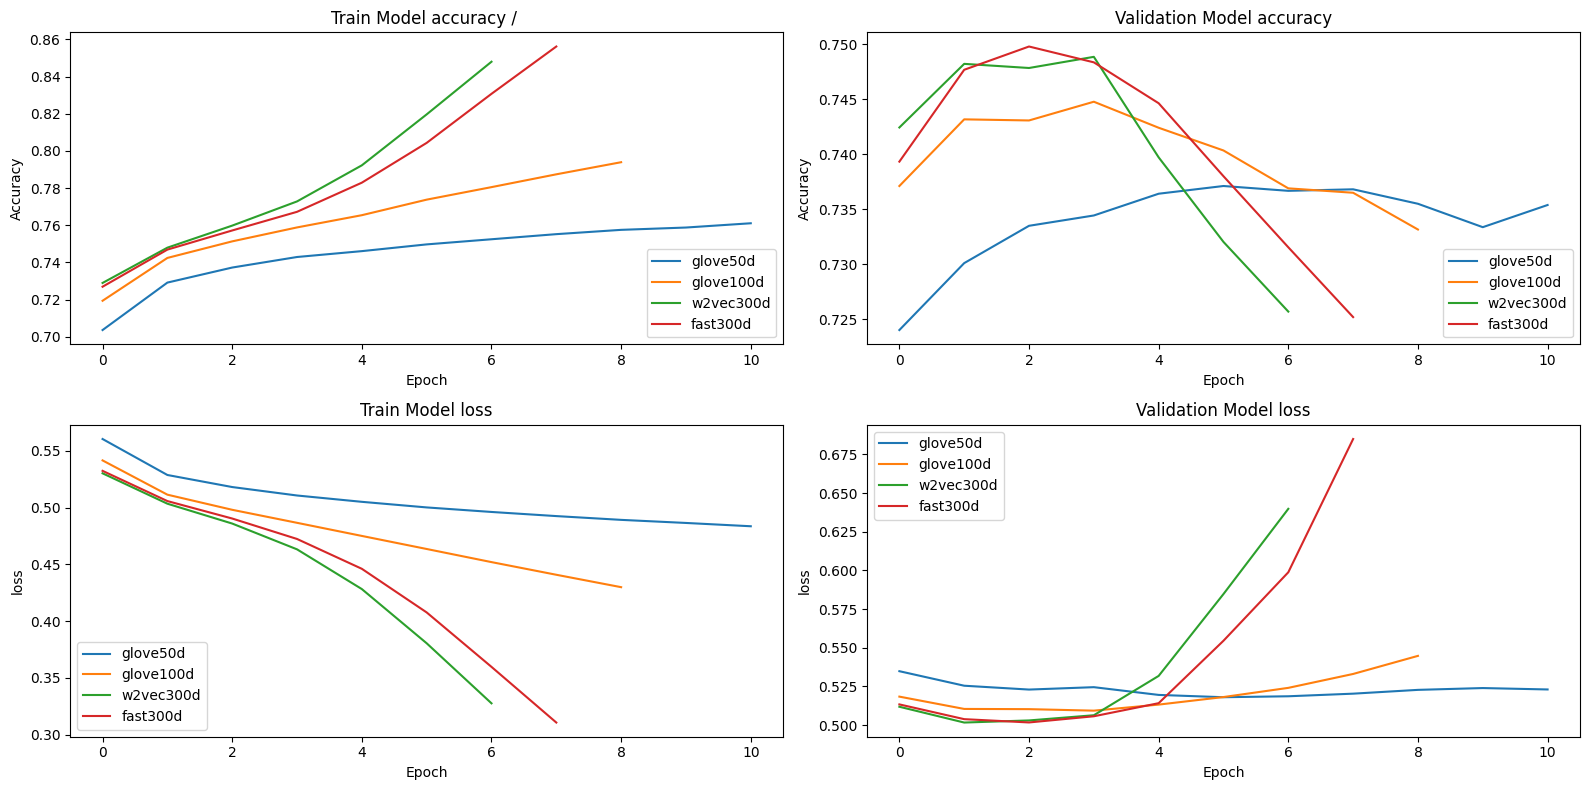

In [90]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [16, 8]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(2, 2)

# Plot training & validation accuracy values
axes[0,0].plot(model_info_1.history['accuracy'])
axes[0,0].plot(model_info_2.history['accuracy'])
axes[0,0].plot(model_info_3.history['accuracy'])
axes[0,0].plot(model_info_4.history['accuracy'])
axes[0,0].set_title('Train Model accuracy / ')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].set_xlabel('Epoch')
axes[0,0].legend(['glove50d','glove100d','w2vec300d','fast300d'], loc='lower right')

axes[0,1].plot(model_info_1.history['val_accuracy'])
axes[0,1].plot(model_info_2.history['val_accuracy'])
axes[0,1].plot(model_info_3.history['val_accuracy'])
axes[0,1].plot(model_info_4.history['val_accuracy'])
axes[0,1].set_title('Validation Model accuracy')
axes[0,1].set_ylabel('Accuracy')
axes[0,1].set_xlabel('Epoch')
axes[0,1].legend(['glove50d','glove100d','w2vec300d','fast300d'], loc='lower right')

axes[1,0].plot(model_info_1.history['loss'])
axes[1,0].plot(model_info_2.history['loss'])
axes[1,0].plot(model_info_3.history['loss'])
axes[1,0].plot(model_info_4.history['loss'])
axes[1,0].set_title('Train Model loss')
axes[1,0].set_ylabel('loss')
axes[1,0].set_xlabel('Epoch')
axes[1,0].legend(['glove50d','glove100d','w2vec300d','fast300d'], loc='lower left')

axes[1,1].plot(model_info_1.history['val_loss'])
axes[1,1].plot(model_info_2.history['val_loss'])
axes[1,1].plot(model_info_3.history['val_loss'])
axes[1,1].plot(model_info_4.history['val_loss'])
axes[1,1].set_title('Validation Model loss')
axes[1,1].set_ylabel('loss')
axes[1,1].set_xlabel('Epoch')
axes[1,1].legend(['glove50d','glove100d','w2vec300d','fast300d'], loc='upper left')

plt.show()

In [91]:
# Measuring score and accuracy on validation set

score1,acc1 = model1.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("Model with glove 50d: Logloss score: %.2f" % (score1)," - Test set Accuracy: %.2f" % (acc1))
score2,acc2 = model2.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("Model with glove 100d: Logloss score: %.2f" % (score2)," - Test set Accuracy: %.2f" % (acc2))

score3,acc3 = model3.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("Model with word2vec 300d: Logloss score: %.2f" % (score3)," - Test set Accuracy: %.2f" % (acc3))
score4,acc4 = model4.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("Model with fasttext 300d: Logloss score: %.2f" % (score4)," - Test set Accuracy: %.2f" % (acc4))

3119/3119 - 7s - loss: 0.5191 - accuracy: 0.7359 - 7s/epoch - 2ms/step
Model with glove 50d: Logloss score: 0.52  - Test set Accuracy: 0.74
3119/3119 - 8s - loss: 0.5115 - accuracy: 0.7433 - 8s/epoch - 2ms/step
Model with glove 100d: Logloss score: 0.51  - Test set Accuracy: 0.74
3119/3119 - 9s - loss: 0.5026 - accuracy: 0.7484 - 9s/epoch - 3ms/step
Model with word2vec 300d: Logloss score: 0.50  - Test set Accuracy: 0.75
3119/3119 - 8s - loss: 0.5028 - accuracy: 0.7484 - 8s/epoch - 3ms/step
Model with fasttext 300d: Logloss score: 0.50  - Test set Accuracy: 0.75


## 5-a test sur toutes les données 1600000 datas 
juste word2vec - 1 seule layer - sans regularisation dropout qui permet d'utiliser cudnn et d'etre 10 fois plus rapide

In [92]:
#on commence par clearer keras et recompiler des modeles 1 layer plus haut

from sklearn.model_selection import train_test_split

#creation des dummies pour le label/target
Y = pd.get_dummies(data['target']).values

#split train / test sur les 500000
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 36, stratify=Y)

In [93]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras import backend

#clear keras session
backend.clear_session()


#taille du vocabulaire /dim du we/ we matrix
vocab_size=len(tokenizer.word_index) + 1


#############################################
embed_dim=300
embedding_matrix=word2vec300d_matrix
lstm_out=300

model3 = Sequential()
model3.add(Embedding(vocab_size, embed_dim, weights=[embedding_matrix], input_length=X.shape[1], trainable=False))
model3.add(LSTM(lstm_out))#, dropout=0.1, recurrent_dropout=0.1))
model3.add(Dense(2,activation='softmax'))
model3.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print('model3',model3.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 300)           10035000  
                                                                 
 lstm (LSTM)                 (None, 300)               721200    
                                                                 
 dense (Dense)               (None, 2)                 602       
                                                                 
Total params: 10,756,802
Trainable params: 721,802
Non-trainable params: 10,035,000
_________________________________________________________________
model3 None


In [94]:
from keras import callbacks

callback3=callbacks.EarlyStopping(monitor="val_loss",patience=5,mode="auto",restore_best_weights=True)

#ne pas ooublier de clearer et recompiler les modèles plus haut

#Here we train the Network.
batch_size= 32

model_info_3=model3.fit(X_train, y_train, batch_size =batch_size,validation_split=0.2, epochs = 50, callbacks=[callback3],  verbose = 2)
print(model_info_3.history.keys())

score3,acc3 = model3.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("Model with word2vec 300d: Logloss score: %.2f" % (score3)," - Test set Accuracy: %.2f" % (acc3))

Epoch 1/50
31933/31933 - 190s - loss: 0.5124 - accuracy: 0.7411 - val_loss: 0.4962 - val_accuracy: 0.7535 - 190s/epoch - 6ms/step
Epoch 2/50
31933/31933 - 191s - loss: 0.4873 - accuracy: 0.7582 - val_loss: 0.4886 - val_accuracy: 0.7583 - 191s/epoch - 6ms/step
Epoch 3/50
31933/31933 - 190s - loss: 0.4701 - accuracy: 0.7686 - val_loss: 0.4911 - val_accuracy: 0.7583 - 190s/epoch - 6ms/step
Epoch 4/50
31933/31933 - 191s - loss: 0.4491 - accuracy: 0.7811 - val_loss: 0.4968 - val_accuracy: 0.7557 - 191s/epoch - 6ms/step
Epoch 5/50
31933/31933 - 190s - loss: 0.4240 - accuracy: 0.7956 - val_loss: 0.5170 - val_accuracy: 0.7516 - 190s/epoch - 6ms/step
Epoch 6/50
31933/31933 - 191s - loss: 0.3971 - accuracy: 0.8107 - val_loss: 0.5340 - val_accuracy: 0.7469 - 191s/epoch - 6ms/step
Epoch 7/50
31933/31933 - 191s - loss: 0.3720 - accuracy: 0.8247 - val_loss: 0.5638 - val_accuracy: 0.7426 - 191s/epoch - 6ms/step
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
9979/9979 - 27s - loss: 0.4891

# E- BERT
* Bidirectional Encoder Representations from Transformers
    * BERT is designed to pre-train deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context in all layers.
    * As a result, the pre-trained BERT model can be fine-tuned with just one additional output layer to create state-of-the-art models for a wide range of tasks, 
        * such as question answering and language inference, without substantial task-specific architecture modifications
* Les Transformers BERT fournissent des milliers de modèle pré entraines:
    * text (100 languages)
        * text classification / sentiment analysis
        * name entity recognition NER (label each word with the entity it represents (person, place, etc.)
        * information feature extraction
        * question answering
        * summarization
        * translation
        * text generation
    * vison
        * image classification
        * object detection
        * segmentation
    * audio
        * speech recognition
        * audio classification
    * combined
        * table question answering
        * optical carcter recognition
        * information extrcation from scanned docs
        * video classification
        * visual question answering
        
* Transformers fournit une API via hugginfface
* backé par 3 librairies JAX / pytorch & tensorflow

* TOKENIZER BERT
    * preprocessing similaires aux pré entrainements
    * split avec les regles du modèle
    * vectorization grace au voc du tokenizer

## 1-exemple

In [5]:
#installation des transformers:
#https://huggingface.co/docs/transformers/installation

#installation via la cmd d anaconda
#pip install transformer
#pip install torch
#pip install tensorflow

#test de l'installation
# par defaut modele: distilbert-base-uncased-finetuned-sst-2-english
# architecture : distilbert
# fine tuned on SST-2 dataset for sentiment analysis
from transformers import pipeline
print(pipeline('sentiment-analysis')('we love you'))

#on choisi tle modele
print(pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")('we love you'))


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


[{'label': 'POSITIVE', 'score': 0.9998704195022583}]
[{'label': '5 stars', 'score': 0.842708945274353}]


In [ ]:
#AutoTokenizer: pour instancier le tokenizer associé au modèle qu'on veut utiliser
#AutoModelForSequenceClassification: pytorch: DL du modele
#TFAutoModelForSequenceClassification: TensorFlow: DL du modele
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

#bert 12 layers 110M de parametres
#model_name = "bert-base-uncased"
model_name = "distilbert-base-uncased"
#bert vocab: 30522 words
#BPE technique pour gerer les mots qui ne sont pas dans le vocab
    #split des mots en plusieurs sous mots faisant parti du vocab
    #'calculates' sera splitté en 'calculate' et '##s'
tokenizer = AutoTokenizer.from_pretrained(model_name)
print(tokenizer.tokenize('how to train the model, lets look at how a trained model calculates its prediction'))


In [343]:
#modele et nombre de classes
#model = TFAutoModelForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=2)
model = TFAutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased',num_labels=2)

classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
print(classifier('we love you'))

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_transform', 'vocab_layer_norm', 'activation_13', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_419']
You should probably TRAIN this model on a down-stream task to be able to use 

[{'label': 'LABEL_1', 'score': 0.5117852687835693}]


## 2- fine tuning / transfer learning

In [1]:
#librairie huggingfaces pour les tranformers
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import time
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras import backend
import os
from sklearn.metrics import confusion_matrix,f1_score,classification_report


def bert_preprocessing(model_name,target,corpus,tok_out_pref,pct_data,token_load=False):
    
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    
    
    #######################################
    if token_load==False:
        start=time.time()
    
        #long max des docs du corpus en mots 
        #max_length=corpus.map(len).max()
        #on gagne un peu en taille de sequence et c est pas negligeable pour la memoire
        max_length=int(corpus.map(len).quantile(0.95))
        #on relabellise les targets en label
        labels=target.map({0:0,4:1})
    
        input_ids=[]
        attention_mask=[]
        for doc in corpus:
            #on garde que les alphanumeriques pur virer les jap par exemple
            doc=re.sub(r'[^a-zA-Z0-9]', ' ', doc)
            #on laisse max_length à 64 (avec Keras/lstm ca tournait plutot autour 25) )
            input2bert=tokenizer.encode_plus(doc, add_special_tokens = True,max_length=max_length, pad_to_max_length = True,truncation=True,  return_attention_mask = True)
            input_ids.append(input2bert['input_ids'])
            attention_mask.append(input2bert['attention_mask'])
    
        input_ids=np.asarray(input_ids, dtype="int64")
        attention_mask=np.asarray(attention_mask, dtype="int64") 
        labels=np.array(labels)

        print('tokenization time', time.time()-start)
    
        #######################################
        pickle_inp_file='./pickle/'+tok_out_pref+'_inp.pkl'
        pickle_mask_file='./pickle/'+tok_out_pref+'_mask.pkl'
        pickle_label_file='./pickle/'+tok_out_pref+'_label.pkl'
    
        #######################################
        start=time.time()
        print('Preparing the pickle file.....')

        with open(pickle_inp_file,'wb') as f:
            pickle.dump((input_ids),f)
        with open(pickle_mask_file,'wb') as f:
            pickle.dump((attention_mask),f)
        with open(pickle_label_file,'wb') as f:
            pickle.dump((labels),f)

        print('Pickle files saved as ',pickle_inp_file,pickle_mask_file,pickle_label_file)
        print('pickle saving time', time.time()-start)
    
    if token_load==True:
        #######################################
        pickle_inp_file='./pickle/'+tok_out_pref+'_inp.pkl'
        pickle_mask_file='./pickle/'+tok_out_pref+'_mask.pkl'
        pickle_label_file='./pickle/'+tok_out_pref+'_label.pkl'
        #######################################
        start=time.time()
        print('Loading the saved pickle files..')
        
        with open(pickle_inp_file,'rb') as f:
            input_ids=pickle.load(f)
        with open(pickle_mask_file,'rb') as f:
            attention_mask=pickle.load(f)
        with open(pickle_label_file,'rb') as f:
            labels=pickle.load(f)

        print('pickle loading time', time.time()-start)
    
    ########################################

    #exemple split 1.6M->10000 :test_size = 0.00625
    X1, X2 ,Z1 ,Z2, y1, y2 = train_test_split(input_ids,attention_mask,labels, test_size = pct_data, random_state = 36, stratify=labels)
    #split train / test 
    # X input / Z attention /y label
    return train_test_split(X2, Z2, y2, test_size = 0.2, random_state = 36, stratify=y2)

    
def bert_tuning(X_train, X_test, Z_train, Z_test, y_train, y_test, model_name,num_labels,log_path,output_name,epochs,batch_size):    
    ########################################
    backend.clear_session()
    #modèle et nombre de classes
    model = TFAutoModelForSequenceClassification.from_pretrained(model_name,num_labels=num_labels)
    print(model.summary())
    #compilation du modèle
    if not os.path.exists(log_path):
        os.mkdir(log_path)
    log_dir=log_path
    
    model_save_path='./bert/'+output_name

    callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath=model_save_path, save_weights_only=True, monitor='val_loss', mode='min', save_best_only=True),keras.callbacks.TensorBoard(log_dir=log_dir)]


    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
    optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5,epsilon=1e-08)

    model.compile(loss=loss,optimizer=optimizer,metrics=[metric])
    
    ########################################
    #training du modèle
    start=time.time()
    history=model.fit([X_train,Z_train],y_train,batch_size=batch_size,epochs=epochs,validation_data=([X_test,Z_test],y_test),validation_batch_size=batch_size,callbacks=callbacks)
    print('training time:',time.time()-start)
    
    ########################################
    #tensorboard
    #%load_ext tensorboard
    #%tensorboard --logdir {log_dir}
    
    ########################################
    #prediction
    #chargement du transformer avec couche finale 
    trained_model = TFAutoModelForSequenceClassification.from_pretrained(model_name,num_labels=num_labels)
    #compilation correpondant à l'entrainement
    trained_model.compile(loss=loss,optimizer=optimizer, metrics=[metric])
    #chargement des poids del'entrainement
    trained_model.load_weights(model_save_path)
    #prediction en proba n colonnes avec n=n labels
    prediction = trained_model.predict([X_test,Z_test],batch_size=batch_size)
    #prediction en label 1 colonne
    pred_labels = np.argmax(prediction.logits, axis=1)
    
    f1 = f1_score(y_test,pred_labels)
    print('F1 score',f1)
    print('Classification Report')
    print(classification_report(y_test,pred_labels,target_names=['0','1']))


In [8]:
#X_train, X_test, Z_train, Z_test, y_train, y_test = bert_preprocessing("distilbert-base-uncased",data['target'],data['text_sw'],'distil_sent_sw',0.99,token_load=False)
#X_train, X_test, Z_train, Z_test, y_train, y_test = bert_preprocessing("distilbert-base-uncased",data['target'],data['text_swlem'],'distil_sent_swlem',0.99,token_load=False)
#X_train, X_test, Z_train, Z_test, y_train, y_test = bert_preprocessing("distilbert-base-uncased",data['target'],data['text_swlemdic'],'distil_sent_swlemdic',0.99,token_load=False)

X_train, X_test, Z_train, Z_test, y_train, y_test = bert_preprocessing("distilbert-base-uncased",[],[],'distil_sent_sw',0.99,token_load=True)
#X_train, X_test, Z_train, Z_test, y_train, y_test = bert_preprocessing("distilbert-base-uncased",[],[],'distil_sent_swlem',0.99,token_load=True)
#X_train, X_test, Z_train, Z_test, y_train, y_test = bert_preprocessing("distilbert-base-uncased",[],[],'distil_sent_swlemdic',0.99,token_load=True)

C:\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:2212: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


tokenization time 168.872216463089
Preparing the pickle file.....
Pickle files saved as  ./pickle/distil_sent_sw_inp.pkl ./pickle/distil_sent_sw_mask.pkl ./pickle/distil_sent_sw_label.pkl
pickle saving time 2.498596668243408


In [3]:
#https://stackoverflow.com/questions/59617755/training-a-bert-based-model-causes-an-outofmemory-error-how-do-i-fix-this

#sw ->sequence de 178 (cas ou on tronque pas)  3h10 par epoque batch size de 8 (11) pour la totalité
#sw ->sequence de 90 (cas ou on tronque à la longueur du quantile 95%)  1h30 par epoque batch size de 20 (23) pour la totalité
bert_tuning(X_train, X_test, Z_train, Z_test, y_train, y_test, "distilbert-base-uncased",2,'./distil_sent_sw_full','mod_distil_sent_sw_full',4,20)
#swlemdic ->sequence de 66  1h par epoque batch size de 32 ca passe pour la totalité
#bert_tuning(X_train, X_test, Z_train, Z_test, y_train, y_test, "distilbert-base-uncased",2,'./distil_sent_swlemdic_full','mod_distil_sent_swlemdic_full',4,32)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_projector', 'vocab_transform', 'vocab_layer_norm', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'pre_classifier', 'dropout_19']
You should probably TRAIN this model on a down-stream task to be able to use i

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMai  multiple                 66362880  
 nLayer)                                                         
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_19 (Dropout)        multiple                  0         
                                                                 
Total params: 66,955,010
Trainable params: 66,955,010
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/4
63227/63227 [==============================] - 5737s 91ms/step 

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_projector', 'vocab_transform', 'vocab_layer_norm', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'dropout_39', 'pre_classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

F1 score 0.8149879303187317
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.78      0.80    158066
           1       0.79      0.84      0.81    158067

    accuracy                           0.81    316133
   macro avg       0.81      0.81      0.81    316133
weighted avg       0.81      0.81      0.81    316133



In [3]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5,epsilon=1e-08)

trained_model = TFAutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased",num_labels=2)
    #compilation correpondant à l'entrainement
trained_model.compile(loss=loss,optimizer=optimizer, metrics=[metric])
    #chargement des poids del'entrainement
trained_model.load_weights('./bert/mod_distil_sent_sw_full')
    #prediction en proba n colonnes avec n=n labels
prediction = trained_model.predict([X_test,Z_test],batch_size=20)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'activation_13', 'vocab_projector', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_19']
You should probably TRAIN this model on a down-stream task to be able to use i

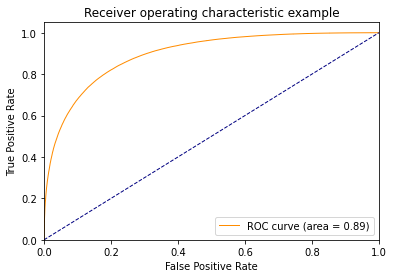

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

Y = pd.get_dummies(y_test).values

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(Y[:, i], prediction.logits[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 1
plt.plot(
    fpr[1],
    tpr[1],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[1],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()